<a href="https://colab.research.google.com/github/Skvorok/netology_pyda/blob/master/Hw_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнаяя работа по визуализации данных.**


In [1]:
# Данный data_set был позаимствован с домашней работы из блока статистики. 
# Таблица показывает данные по продажам авокадо в различных регионах. 
import platform
if platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/drive')
  trajectory = '/content/drive/My Drive/Colab Notebooks/'
else:
  trajectory = ''
    
import pandas as pd
data_file = pd.read_csv(trajectory+'avocado.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
# Параметры "4046", "4225", "4770" обозначают размеры фрукта авокадо. 
# 4046 - маленький размер, 4225 - средний фрукт, 4770 - крупный фрукт. 
data_file

Unnamed: 0        Date  ...  year            region
0               0  2015-12-27  ...  2015            Albany
1               1  2015-12-20  ...  2015            Albany
2               2  2015-12-13  ...  2015            Albany
3               3  2015-12-06  ...  2015            Albany
4               4  2015-11-29  ...  2015            Albany
...           ...         ...  ...   ...               ...
18244           7  2018-02-04  ...  2018  WestTexNewMexico
18245           8  2018-01-28  ...  2018  WestTexNewMexico
18246           9  2018-01-21  ...  2018  WestTexNewMexico
18247          10  2018-01-14  ...  2018  WestTexNewMexico
18248          11  2018-01-07  ...  2018  WestTexNewMexico

[18249 rows x 14 columns]

In [39]:
data_file.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

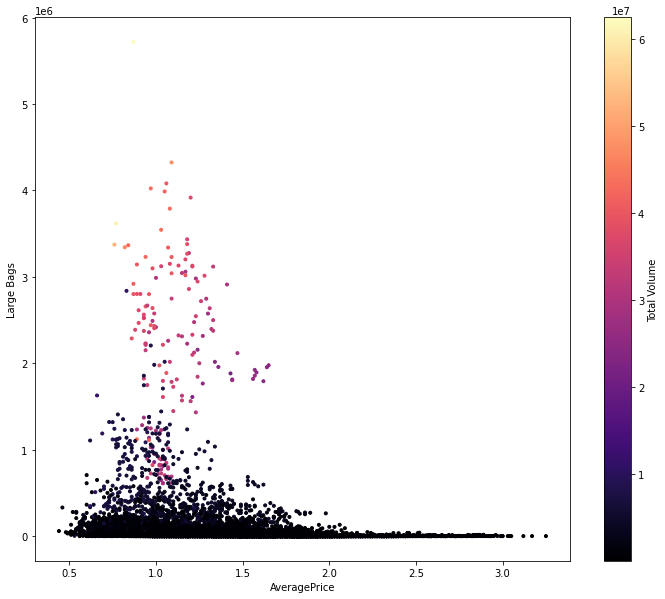

In [22]:
# Визуализация взаимосвязи по параметрам "Total Volume" и "AveragePrice" с помощью точечного графика (между общим объемом авокадо и среднемесячной ценой на фрукт).
plt.scatter(data_file['AveragePrice'],
            data_file['Large Bags'],
            c = data_file['Total Volume'],
            marker = '.',
            cmap = 'magma')
plt.gcf().set_size_inches(12, 10)
plt.xlabel('AveragePrice')
plt.ylabel('Large Bags')
plt.colorbar().set_label(label = 'Total Volume')


**Вывод:** данный график показывает взаимосвязь между среднемесячной установленной ценой на авокадо и всеобщим обьемом данного фрукта в регионе. Мы можем пронаблюдать положительную корреляцию: чем больше всеобщий объем фрукта (в наличии какого-то региона), тем выше вероятность того, что авокадо будут покупать большими сумками.

*Точечная диграмма* удобна тем, что позволяет пронаблюдать степень влияния одной переменной на другую, а это необходимо как в статистических, так и научно - технических исследованиях. 

Text(0.5, 1.0, 'Распределение среднемесячной стоимости авокадо')

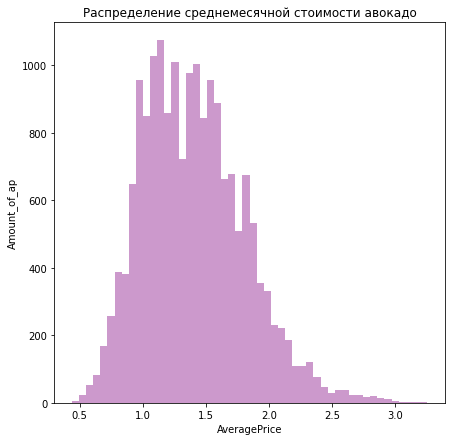

In [41]:
# Визуализация с помощью гистограммы по параметру "AveragePrice".
plt.hist(data_file['AveragePrice'], bins = 50, alpha = 0.4, color = 'purple')
plt.gcf().set_size_inches(7, 7)
plt.xlabel('AveragePrice')
plt.ylabel('Amount_of_ap')
plt.title('Распределение среднемесячной стоимости авокадо')

*Столбчатая гистограмма* используется для статистического измерения распределения по какому-то опредленному признаку, - в данном примере выбран параметр "AveragePrice". Здесь распредление приближено к нормальному. 

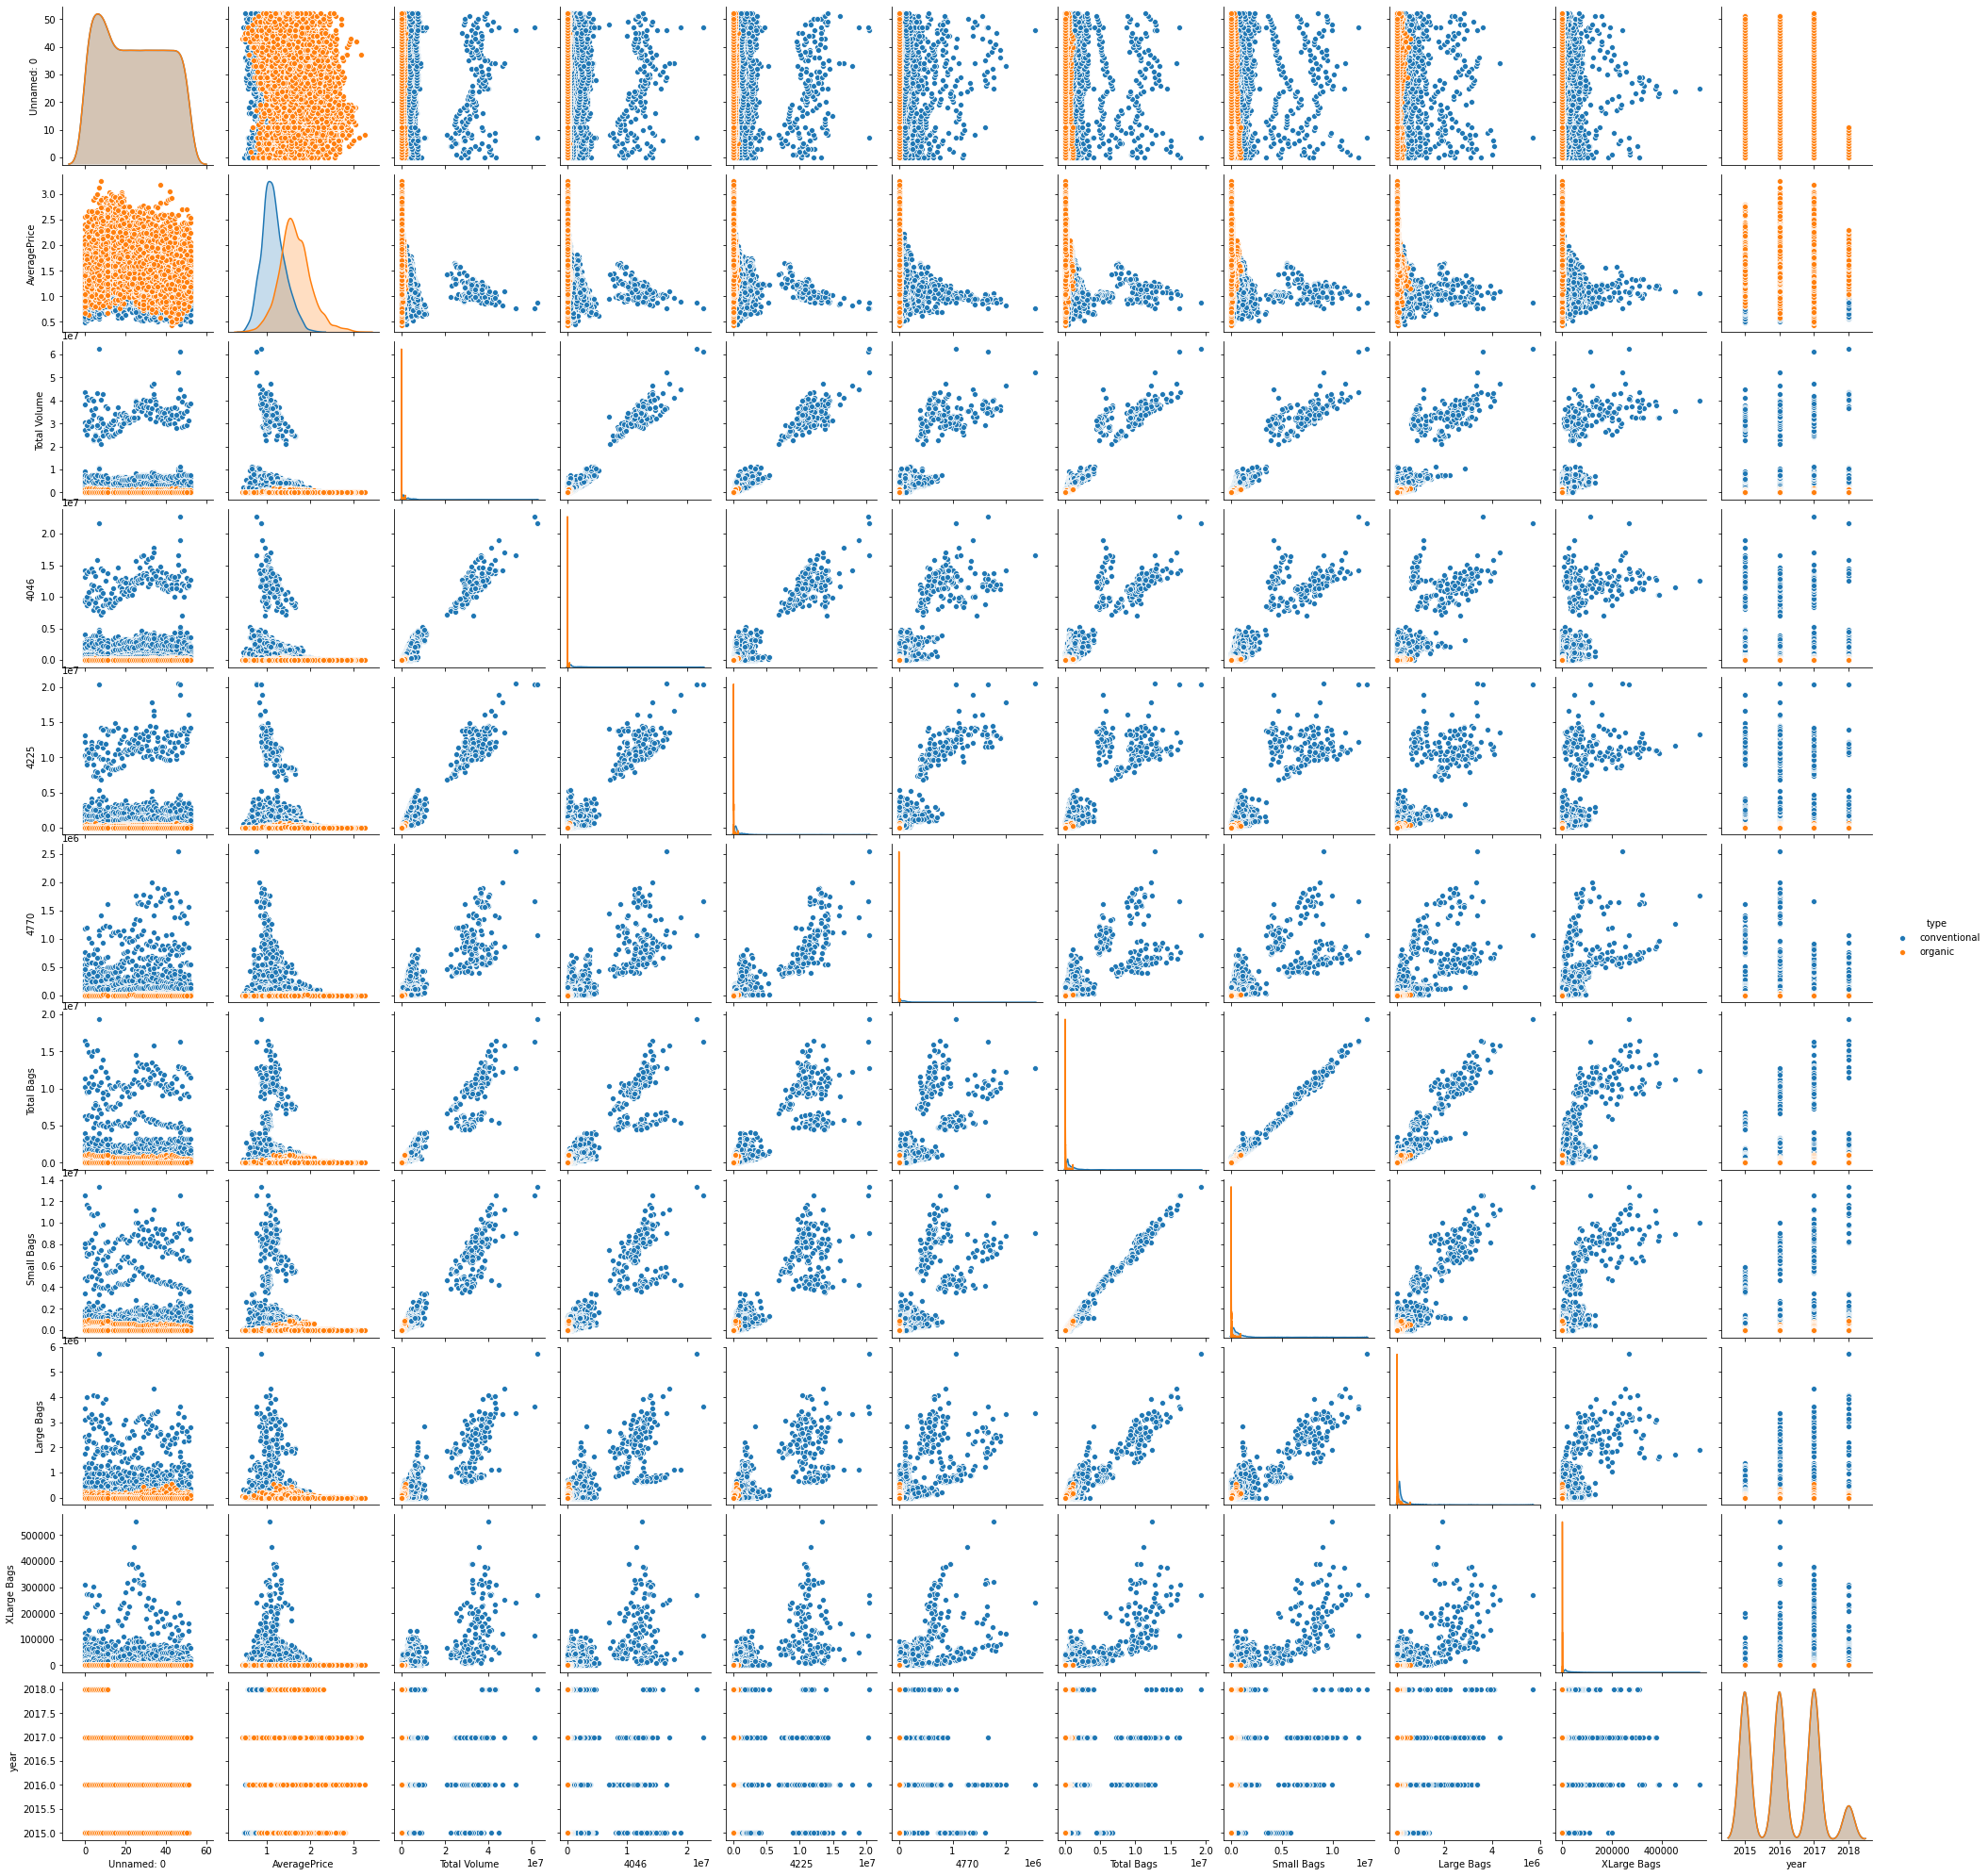

In [66]:
# Всевозможные наглядные парные корреляции по всем параметрам.
sns.pairplot(data_file,diag_kind = 'kde', hue = 'type')

Выше представлены все возможные корреляции всех параметров из data_set попарно. Данный график выгоден тем, что выводит на экран совокупно все корреляции параметров, что облегчает дальнейшую работу исследователю.

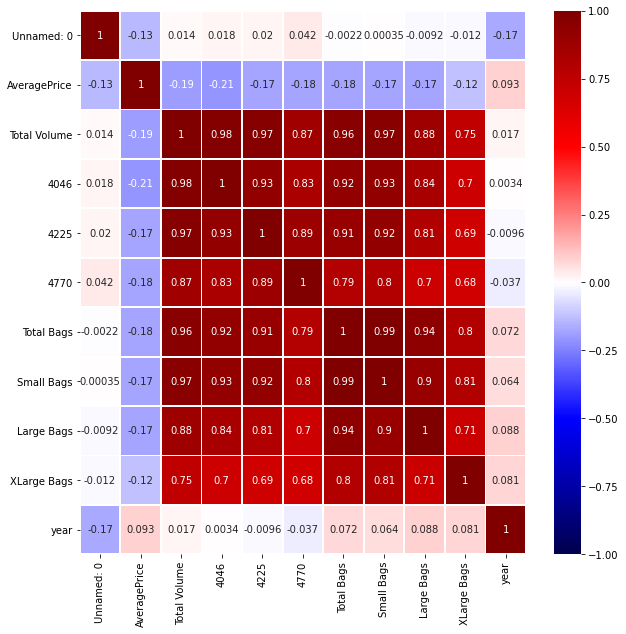

In [72]:
# Визуализация с помощью heatmap для всего data_seta.
sns.heatmap(data_file.corr(), cmap = 'seismic', annot = True,  vmin = -1, vmax = 1, linewidths = 0.8)
plt.gcf().set_size_inches(10,10)

Этот тип визуализации выигрывает своей яркостью, колористичностью и минималистичностью. Удобен в исследованиях всех жанров: статистика, наука.

In [138]:
# Визуализация с помощью интерактивного корреляционного графика.
# Визуализируются параметры "year","small bags","4770" (крупный размер фрукта).
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [0]:
def enable_plotly_in_cell(): # функция для отображения plotly в Colaboratory.
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected = False)

In [140]:
enable_plotly_in_cell()

one = go.Scatter(
        x = data_file['Small Bags'],
        y = data_file['4770'],
        mode = 'markers+text',
        text = data_file['year'],
        textposition ='bottom center')

data = [one]
params = {'title': f'Корреляция между закупками в маленьких сумках и размером авокадо - крупный (4770)', 'yaxis': {'title': 'Размер авокадо - крупный (4770).'}, 
          'xaxis': {'title': 'Small Bags'}}

fig = go.Figure(data = data, layout = params)
    
iplot(fig, show_link = False)



*Интерактивный график* позволяет исследователю завизуализировать взаимосвязи между параметрами чуть более интереснее. Наблюдатель включается глубже в ход исследовательской работы. 

In [120]:
# Визуализация продаж авокадо с помощью круговой диаграммы. 
data_file.groupby(by='year').count()

Unnamed: 0  Date  AveragePrice  ...  XLarge Bags  type  region
year                                  ...                           
2015        5615  5615          5615  ...         5615  5615    5615
2016        5616  5616          5616  ...         5616  5616    5616
2017        5722  5722          5722  ...         5722  5722    5722
2018        1296  1296          1296  ...         1296  1296    1296

[4 rows x 13 columns]

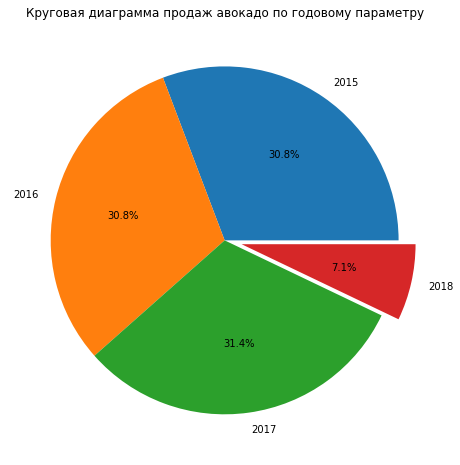

In [135]:
datag = data_file.groupby(by='year').count().type
plt.pie(datag, labels = datag.index, explode = (0,0,0,0.1), autopct = '%1.1f%%')
plt.title('Круговая диаграмма продаж авокадо по годовому параметру')
plt.gcf().set_size_inches(8,8)


**Вывод**: диаграмма показывает, что самые меньшие продажи авокадо случались в 2018 году, с 2015 - 2017 продаваемость этого фрукта была на одном уровне. 

*Круговая диаграмма* также, как и heatmap (например), является одним из самых наглядных и нарядных инструментов оформления статистичесих данных.

